# Importing Libraries

In [47]:

import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
import graphviz

# Scikit-learn: Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Scikit-learn: Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Scikit-learn: Machine learning model
from sklearn.ensemble import RandomForestClassifier

# Scikit-learn: Tree visualization
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# 1. Process the Data with All Features

## 1.1 Loading the Data into a Pandas DataFrame

In [48]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Code Block 1B

In [49]:
# Specify the file path to the CSV file containing the thyroid cancer recurrence data
csv_path = "/content/drive/MyDrive/Colab Notebooks/Detect Thyroid Cancer Reoccurrence using patient data/dataset.csv"

df = pd.read_csv(csv_path)

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### 1.1.1 Label Encoding

In [5]:
# Label encoding yes or no values

# Define mapping
mapping = {'No': 0, 'Yes': 1}

# TODO: Insert names of columns that have Yes or No values
boolean_columns = ['Smoking','Hx Smoking','Hx Radiothreapy','Recurred']
df[boolean_columns] = df[boolean_columns].map(mapping.get)

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0
1,34,F,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
2,30,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
3,62,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0
4,62,F,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0


In [6]:
# Label encode features with only 2 values
le = LabelEncoder()

# TODO: Input column names that only have 2 values
columns_to_encode = ['Gender', 'Focality', 'M']

for column in columns_to_encode:
  df[column] = le.fit_transform(df[column])

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,0,I,Excellent,0


### 1.1.2 Label Encoding with Order

In [7]:
df['Physical Examination'].unique()

array(['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter'],
      dtype=object)

In [8]:
# TODO: Define mapping for 'Physical Examination'
mapping = {'Normal':0, 'Diffuse goiter':1,'Single nodular goiter-left':2, 'Single nodular goiter-right':2, 'Multinodular goiter':3}

df['Physical Examination'] = df['Physical Examination'].map(mapping)

if np.isnan(df['Physical Examination'].unique()).any():
 raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,No,Micropapillary,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,No,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,No,Micropapillary,0,Low,T1a,N0,0,I,Excellent,0


In [9]:
# TODO: Use the .unique() function to find the unique values for 'Adenopathy'
df['Adenopathy'].unique()

array(['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior'],
      dtype=object)

In [10]:
# TODO: Define mapping for 'Adenopathy'
mapping = {'No':0, 'Left':1, 'Right':1, 'Posterior':2,'Bilateral':3, 'Extensive':4}

df['Adenopathy'] = df['Adenopathy'].map(mapping)

if np.isnan(df['Adenopathy'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,Micropapillary,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,Micropapillary,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,Micropapillary,0,Low,T1a,N0,0,I,Excellent,0


In [11]:
# TODO: Use the .unique() function to find the unique values for 'Pathology'
df['Pathology'].unique()

array(['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell'],
      dtype=object)

In [12]:
# TODO: Define mapping for 'Pathology'
mapping = {'Micropapillary':0, 'Papillary':1, 'Follicular':2, 'Hurthel cell':3}

df['Pathology'] = df['Pathology'].map(mapping)

if np.isnan(df['Pathology'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,Low,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,Low,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,Low,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,Low,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,Low,T1a,N0,0,I,Excellent,0


In [13]:
# TODO: Use the .unique() function to find the unique values for 'Risk'
df['Risk'].unique()

array(['Low', 'Intermediate', 'High'], dtype=object)

In [14]:
# TODO: Define mapping for 'Risk'
mapping = {'Low':0,'Intermediate':1, 'High':2}

df['Risk'] = df['Risk'].map(mapping)

if np.isnan(df['Risk'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,T1a,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,T1a,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,T1a,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,T1a,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,T1a,N0,0,I,Excellent,0


In [15]:
# TODO: Use the .unique() function to find the unique values for 'T'
df['T'].unique()

array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [16]:
# TODO: Define mapping for 'T'
mapping = {'T1a':0, 'T1b':1, 'T2':2, 'T3a':3, 'T3b':4, 'T4a':5, 'T4b':6}

df['T'] = df['T'].map(mapping)

if np.isnan(df['T'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,N0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,N0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,N0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,N0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,N0,0,I,Excellent,0


In [17]:
# TODO: Use the .unique() function to find the unique values for 'N'
df['N'].unique()

array(['N0', 'N1b', 'N1a'], dtype=object)

In [18]:
# TODO: Define mapping for 'N'
mapping = {'N0':0,'N1b':1, 'N1a':2}

df['N'] = df['N'].map(mapping)

if np.isnan(df['N'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,0,I,Excellent,0


In [19]:
# TODO: Use the .unique() function to find the unique values for 'Stage'
df['Stage'].unique()

array(['I', 'II', 'IVB', 'III', 'IVA'], dtype=object)

In [20]:
# TODO: Define mapping for 'Stage'
mapping = {'I':0, 'II':1,  'III':2, 'IVA':3, 'IVB':4}

df['Stage'] = df['Stage'].map(mapping)

if np.isnan(df['Stage'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,Indeterminate,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,0,0,Excellent,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,Excellent,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,Excellent,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,0,0,Excellent,0


In [21]:
# TODO: Use the .unique() function to find the unique values for 'Response'
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [22]:
# TODO: Define mapping for 'Response'
mapping = {'Excellent':0, 'Indeterminate':1, 'Structural Incomplete':2, 'Biochemical Incomplete':3}

df['Response'] = df['Response'].map(mapping)

if np.isnan(df['Response'].unique()).any():
  raise ValueError('Your output has NaN values. Check your mapping inputs to make sure they exactly match the unique values.')

df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,1,0
1,34,0,0,1,0,Euthyroid,3,0,0,1,0,0,0,0,0,0,0
2,30,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,0,0
3,62,0,0,0,0,Euthyroid,2,0,0,1,0,0,0,0,0,0,0
4,62,0,0,0,0,Euthyroid,3,0,0,0,0,0,0,0,0,0,0


### 1.1.3 One-Hot Encoding

In [23]:
# Initialize a OneHotEncoder object
ohe = OneHotEncoder()

# converts the sparse matrix output into a dense numpy array.
ohe.fit_transform(df[['Thyroid Function']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [24]:
# Fit the OneHotEncoder to the 'Thyroid Function' column of the dataframe 'df'
feature_array = ohe.fit_transform(df[['Thyroid Function']]).toarray()

# Get the category labels from the fitted OneHotEncoder
feature_labels = ohe.categories_

# Convert the list of arrays (from ohe.categories_) to a flattened numpy array
feature_labels = np.array(feature_labels).ravel()

# Create a DataFrame from the one-hot encoded array with column names set to the flattened feature labels
pd.DataFrame(feature_array, columns=feature_labels)

,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
378,0.0,0.0,1.0,0.0,0.0
379,0.0,0.0,1.0,0.0,0.0
380,0.0,0.0,1.0,0.0,0.0
381,1.0,0.0,0.0,0.0,0.0


In [25]:
# Create a DataFrame from the one-hot encoded array (feature_array)
# using the flattened feature labels (feature_labels) as column names
features = pd.DataFrame(feature_array, columns=feature_labels)

# Concatenate the original dataframe (df) and the new one-hot encoded features (features)
# along the columns (axis=1). This results in a combined DataFrame with both the original
# and one-hot encoded features.
pd.concat([df, features], axis=1)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,...,N,M,Stage,Response,Recurred,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,27,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0
1,34,0,0,1,0,Euthyroid,3,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,30,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,62,0,0,0,0,Euthyroid,2,0,0,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,62,0,0,0,0,Euthyroid,3,0,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,Euthyroid,2,1,1,1,...,1,1,4,3,1,0.0,0.0,1.0,0.0,0.0
379,81,1,1,0,1,Euthyroid,3,4,1,0,...,1,1,4,2,1,0.0,0.0,1.0,0.0,0.0
380,72,1,1,1,0,Euthyroid,3,3,1,0,...,1,1,4,2,1,0.0,0.0,1.0,0.0,0.0
381,61,1,1,1,1,Clinical Hyperthyroidism,3,4,3,0,...,1,0,3,2,1,1.0,0.0,0.0,0.0,0.0


In [26]:
# Concatenate the original dataframe (df) with the new one-hot encoded features (features)
# along the columns (axis=1). This adds the one-hot encoded columns to the original dataframe.
df = pd.concat([df, features], axis=1)

# Drop the original 'Thyroid Function' column from the dataframe
# as it has been replaced by the one-hot encoded columns.
df = df.drop(['Thyroid Function'], axis='columns')

# Display the first few rows of the updated dataframe to inspect the result.
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Physical Examination,Adenopathy,Pathology,Focality,Risk,...,N,M,Stage,Response,Recurred,Clinical Hyperthyroidism,Clinical Hypothyroidism,Euthyroid,Subclinical Hyperthyroidism,Subclinical Hypothyroidism
0,27,0,0,0,0,2,0,0,1,0,...,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0
1,34,0,0,1,0,3,0,0,1,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
2,30,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
3,62,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
4,62,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0


### 1.1.4 Split to Train and Test

In [27]:
# Drop the 'Recurred' column from the DataFrame to create the input features DataFrame
inputs = df.drop('Recurred', axis='columns')

# Select the target column 'Recurred' from the DataFrame to create the target DataFrame
target = df['Recurred']

Code Block 1X

In [30]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (306, 20)
X_test shape: (77, 20)
y_train shape: (306,)
y_test shape: (77,)


## 1.2 Train the Model

In [31]:
# Creating a Decision Tree Classifier model object
model = RandomForestClassifier()

In [32]:
# Fitting the model to the training data (X_train) and corresponding labels (y_train)
model.fit(X_train, y_train)


RandomForestClassifier()

## 1.3 Evaluate the Model

In [33]:
# Evaluating the trained model's performance on the test data (X_test) and corresponding labels (y_test)
model.score(X_test, y_test)

0.987012987012987

y_test = Actual Group

y_pred = Predicted Group

In [34]:
# Printing out the original group to compare
y_test = y_test.to_numpy()

print(y_test)

[0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0]


In [35]:
# Using the trained model to make predictions on the test data (X_test)
y_pred = model.predict(X_test)

# Printing the predicted labels
print(y_pred)

[0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 1 0]


## 1.4 Visualize the Model

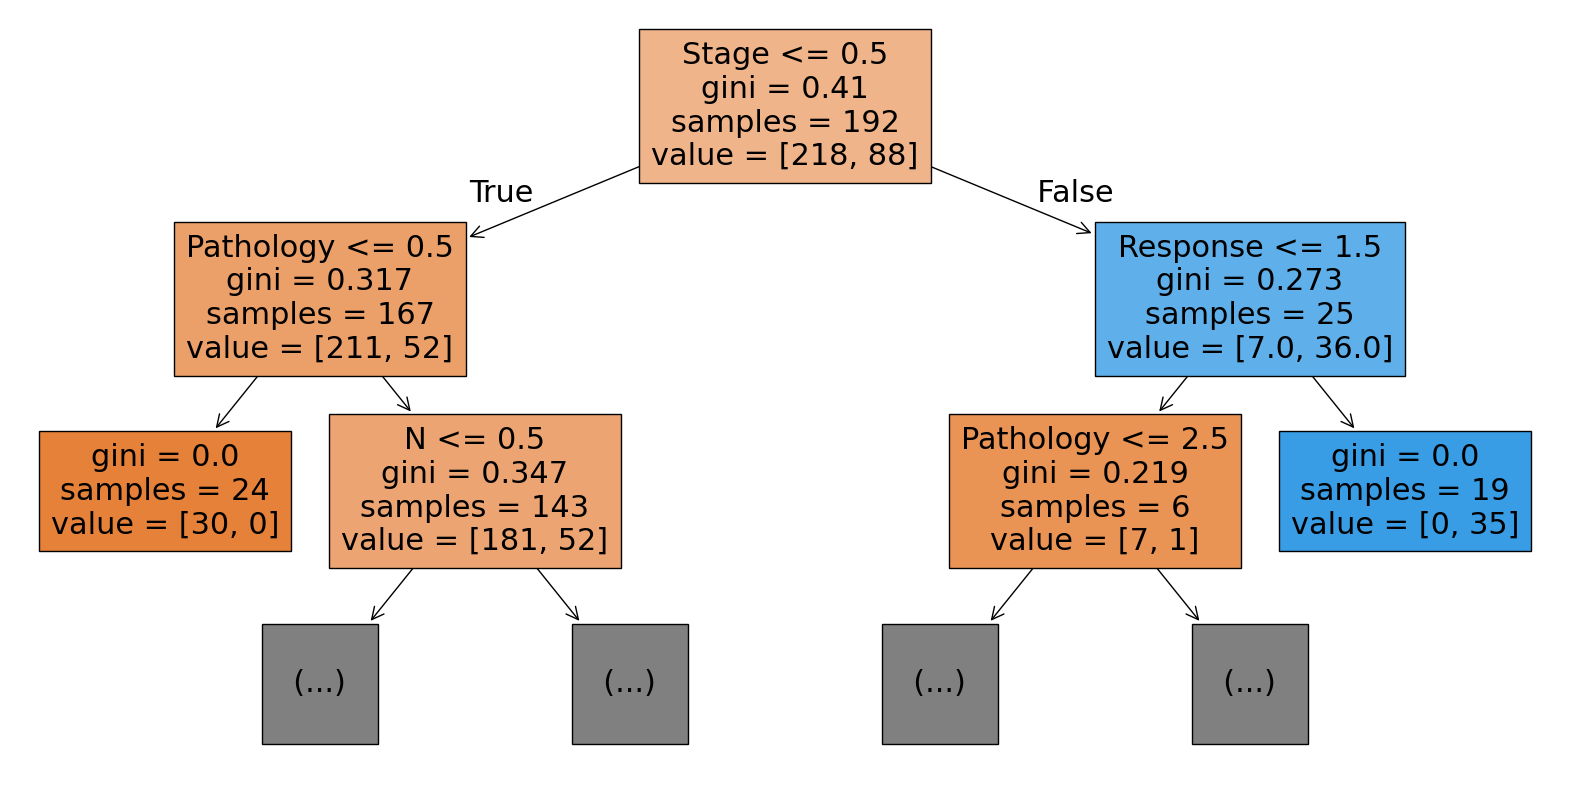

In [36]:
# TODO: Change this value to view the other decision trees
tree_number = 8

# TODO: Change this value to change the depth of the decision tree
max_depth = 2

feature_names = list(df.columns)
feature_names.pop(15)

# Plot the first tree
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[tree_number], feature_names=feature_names, max_depth=max_depth, filled=True)
plt.show()

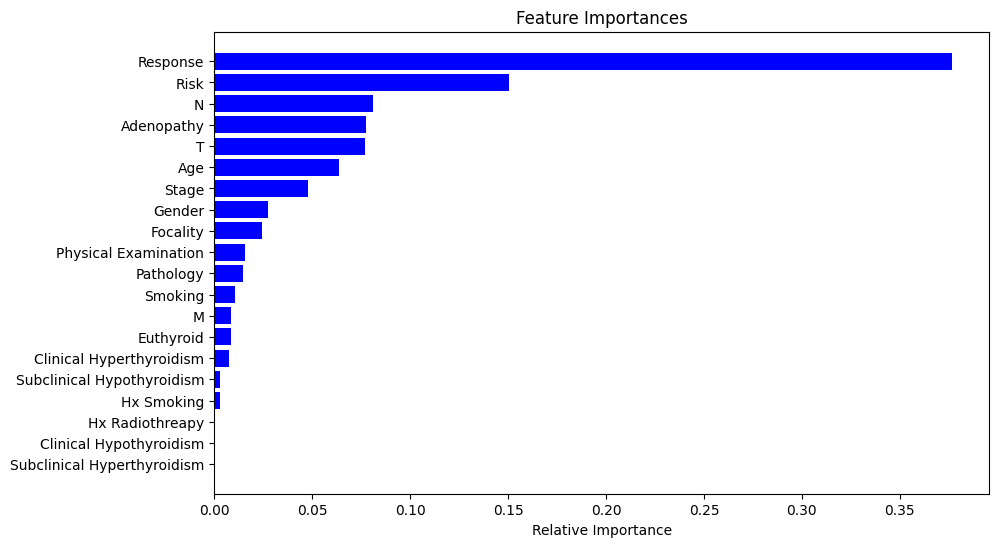

In [37]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

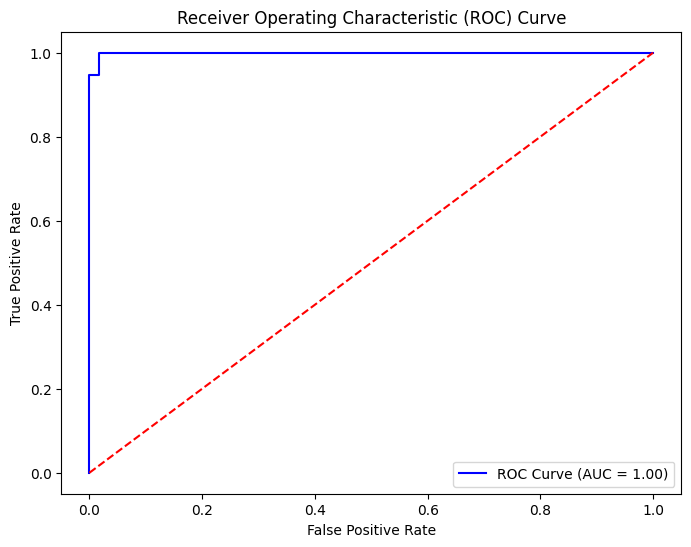

In [38]:
# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Building a Predictive System

In [46]:
input_data = (1, 0, 1, 1, 0, 1, 0, 0 ,1 ,1, 0, 0, 0 ,0 ,0, 0, 0, 1,0, 0) #Adjusted input data to 20 features to match the training data

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The patient is not  detected with thyroid cancer Recurrance.')
else:
  print('The patient is detected with thyroid cancer Recurrance.')

[0]
The patient is not  detected with thyroid cancer Recurrance.
